# KC House Pricing Model

**Authors:** 
***

<p align="center">
    <img src="Interstate 5 North - King County South - AARoads - Washington.jpeg" alt="Interstate 5 North - King County South - AARoads - Washington" width="700" height="450" />
</p>
Welcome to King County!

# Overview
---
> As part of a real estate agency, we came up with a project that helps homeowners buy and/or sell homes in northwestern bound King County.

# Business Problem
---
> The real estate agency aims to assist homeowners in King County with selling their properties by providing advice on which features greatly influence house prices. By focusing on these features, homeowners increase their chances of landing a good deal and thus earning higher profits. Alternately, the real estate agency is able to provide advice to homebuyers on the approximate price of houses based on their preferred choice of features.

## 1. Main Objective

> The main focus of this project is to identify the key factors that affect home prices in the area, allowing homeowners to make informed decisions about pricing strategies and property enhancements to maximize their sale potential.

## 1.1 Important research questions

>1. Market Analysis:
    * What are the current market trends and conditions in King County's real estate market?
    * What is the outlook for the King County real estate market in terms of future growth and stability?
>2. Property Characteristics:
    * What are the typical features and characteristics of homes that command higher prices in King County?
    * How do factors like property size, number of bedrooms and bathrooms, floor plan layout, and architectural style correlate with home prices?
>3. Neighborhood Analysis:
    * Does the quality of view of houses have a significant effect on price?

## 1.2 Hypotheses
* The square footage of living space has the greatest impact on house prices.
* Properties with waterfront views command a premium price.
* Recent renovations positively impact house prices.

# Data Understanding

### 1. Where did the data come from, and how do they relate to the data analysis questions? 
The data comes from the King County House Sales dataset, which likely contains information on various properties sold in King County, Washington. This dataset is relevant to the data analysis questions as it provides insights into the factors influencing house prices in the area.


### 2. What do the data represent? Who is in the sample and what variables are included?
The data in the King County House Sales dataset represent information about house sales in King County, Washington. Each row in the dataset likely represents a single house sale transaction, with various attributes recorded for each property.
The dataset provides a comprehensive view of house sales in King County, including details about the properties sold and their associated attributes. This information is valuable for analyzing market trends, understanding factors influencing house prices, and providing insights to homeowners and real estate professionals.

### 3. What is the target variable?
In the King County House Sales dataset, the target variable is likely the "price" column. This variable represents the sale price of the houses. The goal of the analysis is typically to predict house prices based on various features such as square footage, number of bedrooms, bathrooms, location, and other relevant attributes. Therefore, the "price" variable is the main focus of the analysis, and the regression models will be trained to predict this target variables.

### 4. What are the properties of the variables you intend to use?

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Displaying the first rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Summary statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


In [6]:
# Shape of Data
data.shape

(21597, 21)

In [7]:
# Column names 
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Data Preparation
> A description and justification of the data cleaning process before analyzing.

## 1. Data Cleaning

### 1.1  Address Missing values and Duplicates 

#### 1.1.1 Check for missing values

In [8]:
# Check for missing values and their respective columns
missing_values = data.isna().sum()    
print(missing_values)
print("====================================")
print("List of columns with missing values:")
print("====================================")
missing_values[missing_values > 0].index.tolist()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
List of columns with missing values:


['waterfront', 'view', 'yr_renovated']

> The columns `waterfront`, `view` and `yr_renovated` contain missing values. We drop them since they can compromise the integrity of the dataset, potentially leading to biased analysis or inaccurate results.

#### 1.1.2 Drop entries with missing values

In [9]:
# Drops rows with any null values
data.dropna(inplace = True)
data.shape

(15762, 21)

#### 1.1.3 Check for duplicates

In [10]:
# Check for duplicates that might affect the data
duplicates = data.duplicated().unique().sum
print("There are {} duplicates from the data.".format(duplicates()))

There are 0 duplicates from the data.


#### 1.1.4 Drop columns

In [11]:
# Drop columns not applicable in this analysis
col_dropped = data[['id', 'zipcode','lat', 'long']]
for col in col_dropped:
    data.drop(columns = col ,inplace = True)
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

### 1.2 Update columns

#### 1.2.1 Change `yr_renovated` into an integer

In [12]:
# Change year to integer
data['yr_renovated'] = data['yr_renovated'].astype(int)
data['yr_renovated'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15762 entries, 1 to 21596
Series name: yr_renovated
Non-Null Count  Dtype
--------------  -----
15762 non-null  int32
dtypes: int32(1)
memory usage: 184.7 KB


#### 1.2.2 Change `date` column into date format(yyyy/mm/dd)

In [13]:
# Date into date format(YYYY-MM-DD)
data['date'] = pd.to_datetime(data['date'])
data['date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15762 entries, 1 to 21596
Series name: date
Non-Null Count  Dtype         
--------------  -----         
15762 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 246.3 KB


#### 1.2.3 Change `sqft_basement` into a float

In [14]:
# preview sqft_basement values
data['sqft_basement'].unique()

array(['400.0', '910.0', '0.0', '1530.0', '?', '730.0', '300.0', '970.0',
       '760.0', '720.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '588.0', '1510.0', '990.0', '600.0', '550.0', '1000.0',
       '1600.0', '1700.0', '500.0', '700.0', '1040.0', '1010.0', '240.0',
       '290.0', '800.0', '540.0', '560.0', '840.0', '770.0', '570.0',
       '1490.0', '620.0', '650.0', '180.0', '1130.0', '450.0', '1640.0',
       '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0', '1310.0',
       '630.0', '2000.0', '390.0', '210.0', '1950.0', '440.0', '220.0',
       '1160.0', '580.0', '2060.0', '1820.0', '1180.0', '380.0', '1150.0',
       '1200.0', '680.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0',
       '870.0', '1250.0', '1100.0', '1400.0', '530.0', '490.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.0', '270.0',
       '350.0', '935.0', '200.0', '850.0', '1470.0', '160.0', '950.0',
       '1370.0', '460.0', '50.0', '710.0', '1900.0', 

#### 1.2.4 Change the `?` values into `np.nan` then drop the missing values.
> First deal with the missing values.

In [15]:
# Convert values with ? 
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan)

print(data['sqft_basement'].head())
missing_values_count = data['sqft_basement'].isnull().sum()
print(f"Number of missing values: {missing_values_count}")

# Drop the missing values
data.dropna(inplace=True)
missing_values_count = data['sqft_basement'].isnull().sum()
print(f"Number of missing values: {missing_values_count}")

1     400.0
3     910.0
4       0.0
5    1530.0
6       NaN
Name: sqft_basement, dtype: object
Number of missing values: 333
Number of missing values: 0


#### 1.2.5 Change into a float

In [16]:
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['sqft_basement'].dtype

dtype('float64')

#### 1.2.6 Change `grade` into an integer 

In [17]:
# Modify the grade column to have only the grade value.
data.loc[:, 'grade'] = data['grade'].str.split(' ').str[0]

# Changing the data type of grade from str to int
data.loc[:, 'grade'] = data['grade'].astype(np.int64)
data['grade'].unique()

array([ 7,  8, 11,  9,  6,  5, 10, 12,  4,  3, 13], dtype=int64)

## 2. Feature Engineering
### 2.1 Map `views` and `condition` into a numerical scale
**Note:**`views` & `condition` are **ordinal** variables. This means they are **ranked** in a specific order: 0 - 4

In [18]:
# Create a dictionary rating_map for mapping
rating_map = {
                'NONE': 0,
                'FAIR': 1,
                'AVERAGE': 2,
                'GOOD': 3,
                'EXCELLENT': 4,
                'Poor': 0,
                'Fair': 1,
                'Average': 2,
                'Good': 3,
                'Very Good': 4
}
data['view_rating'] = data['view'].map(rating_map)
data['condition_rating'] = data['condition'].map(rating_map)
print(data['view_rating'].unique())
data['condition_rating'].unique()

[0 3 4 2 1]


array([2, 4, 3, 0, 1], dtype=int64)

### 2.2 Convert `waterfront` into integer

In [19]:
def convert_boolean(df,x=None):
        '''
        This function converts all boolean data into numeric types
        Used in numeric_df
        input dataframe
        '''
        boolean_cols = df.select_dtypes(include='object').columns
        column_name = []
        for col in boolean_cols:
            if set(df[col].unique()) == {'YES', 'NO'}:
                df['waterfront_bool'] = df[col].replace({ "YES": 1, "NO": 0})
                column_name.append(col)

        print(f'Boolean Conversions:{column_name}')

### 2.2 Create a new feature named `yrs_since_renovated`

In [20]:
# Get the current year using Pandas Timestamp
current_year = pd.Timestamp.now().year

# Define a function to calculate years since renovation or years since built
def calculate_years_since_renovation(row):

    if row['yr_renovated'] < 1:
        return current_year - row['yr_built']
    else:
        return current_year - row['yr_renovated']

# Apply the function to each row in the DataFrame along the specified axis and store the result in a new column 'yrs_since_renovated'
data['yrs_since_renovated'] = data.apply(calculate_years_since_renovation, axis=1)
data['yrs_since_renovated'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15429 entries, 1 to 21596
Series name: yrs_since_renovated
Non-Null Count  Dtype
--------------  -----
15429 non-null  int64
dtypes: int64(1)
memory usage: 241.1 KB


### 2.3 Create a new feature `age_of_house`
> We are going to explore this feature later on during modeling.

In [21]:
data['age_of_house'] = data['date'].dt.year - data['yr_built']

## 3. Handling Outliers
### 3.1 Visualizing the data
> Let's start by creating boxplots to have a feel of the data.

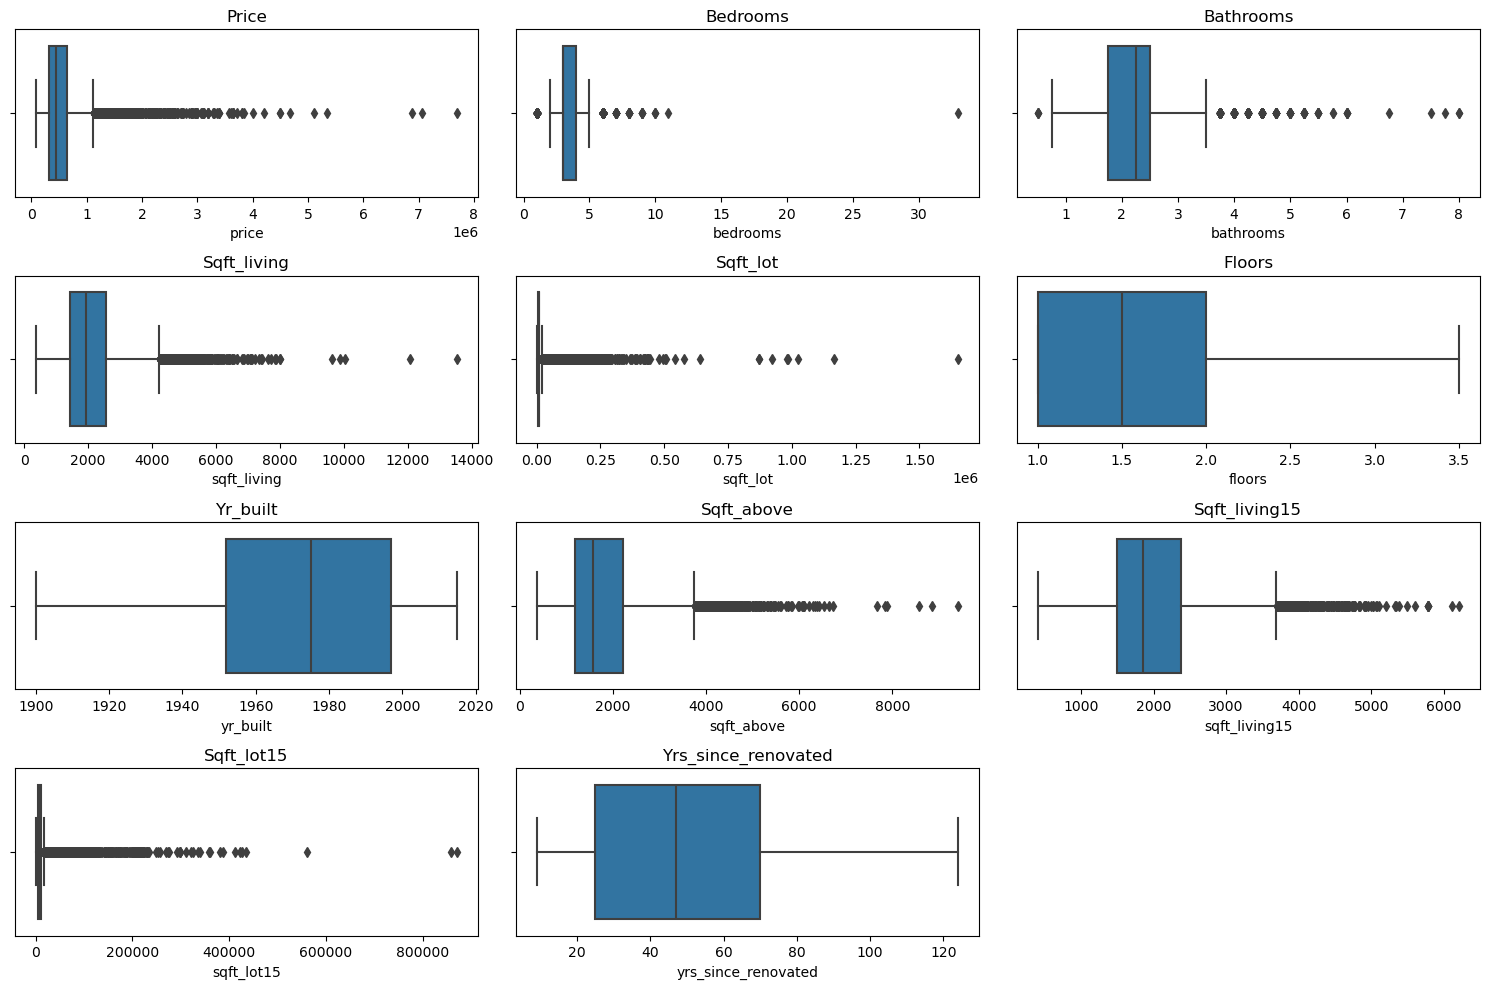

In [22]:
# Selecting numeric columns
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                   'yr_built', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'yrs_since_renovated']

# Create box plots for all numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'{column.capitalize()}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

> It is evident that most of the features have outliers in them. Outliers can lead to incorrect inferences and conclusions about the underlying relationship between variables. They also violate the assumptions of normality and linearity, so we remove them.

### 3.2 Removing outliers

In [23]:
def find_outlier_limits(column, num_std=3):
    
    mean = np.mean(column)
    std_dev = np.std(column)
    
    lower_limit = mean - num_std * std_dev
    upper_limit = mean + num_std * std_dev
    
    return lower_limit, upper_limit
find_outlier_limits(data['sqft_living'],num_std=3)

(-673.041761831078, 4844.074881281464)

In [24]:
def filter_outliers(data, num_std=3,exclude_columns = []):
    
    filtered_data = data.copy()

    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_columns:
            lower_limit, upper_limit = find_outlier_limits(data[col], num_std)
            print(f"Column: {col}, Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")
            outliers_removed = data[(data[col] < lower_limit) | (data[col] > upper_limit)].shape[0]
            print(f"Outliers removed in column '{col}': {outliers_removed}")
            outliers_mask = (data[col] < lower_limit) | (data[col] > upper_limit)
            
            filtered_data = filtered_data[~outliers_mask]
    
    return filtered_data


columns_to_exclude = ['view_rating', 'yr_built', 'yr_renovated','price', 'grade', 'waterfront_bool', 'lat', 'long']
clean_data = filter_outliers(data,num_std=3,exclude_columns =columns_to_exclude)
print('Original data:', len(data))
print('Filtered data:', len(clean_data))

Column: bedrooms, Lower Limit: 0.5762569078209379, Upper Limit: 6.181277605109258
Outliers removed in column 'bedrooms': 43
Column: bathrooms, Lower Limit: -0.1794986487457817, Upper Limit: 4.422515046438438
Outliers removed in column 'bathrooms': 133
Column: sqft_living, Lower Limit: -673.041761831078, Upper Limit: 4844.074881281464
Outliers removed in column 'sqft_living': 177
Column: sqft_lot, Lower Limit: -110701.86284098103, Upper Limit: 141274.18275802038
Outliers removed in column 'sqft_lot': 256
Column: floors, Lower Limit: -0.1221005018527288, Upper Limit: 3.111211915424574
Outliers removed in column 'floors': 6
Column: sqft_above, Lower Limit: -693.7102422541473, Upper Limit: 4281.12070307468
Outliers removed in column 'sqft_above': 184
Column: sqft_basement, Lower Limit: -1038.2440259879004, Upper Limit: 1621.866684617753
Outliers removed in column 'sqft_basement': 177
Column: sqft_living15, Lower Limit: -63.39524501409642, Upper Limit: 4045.24902685349
Outliers removed in c

### 3.3 Checking for Normal Distribution

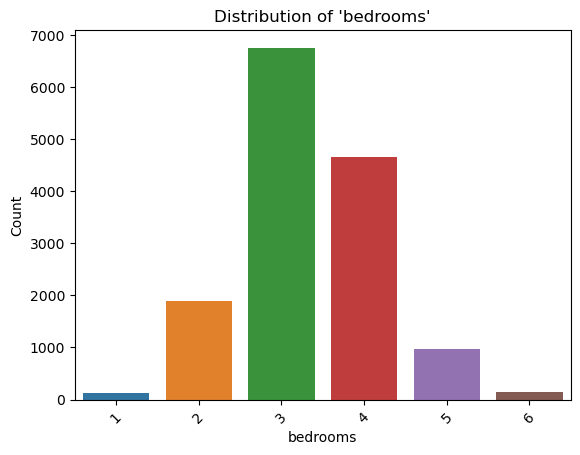

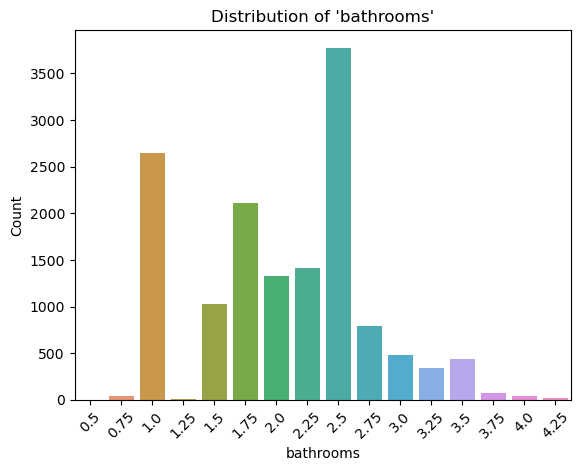

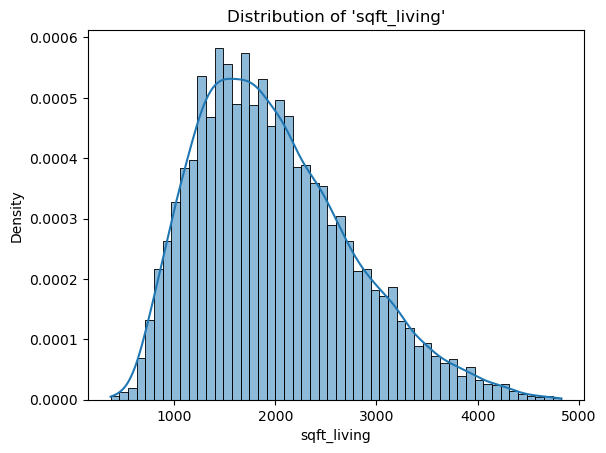

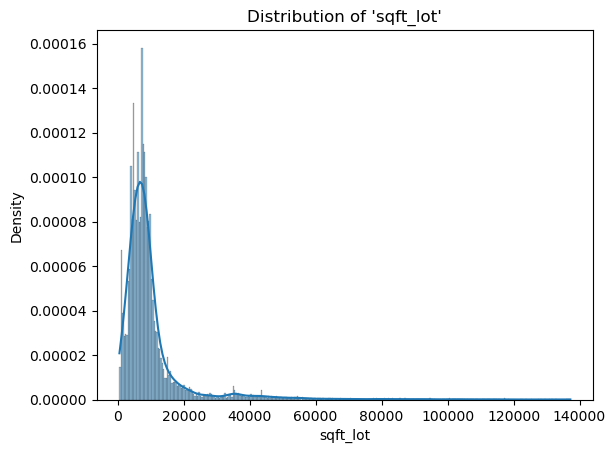

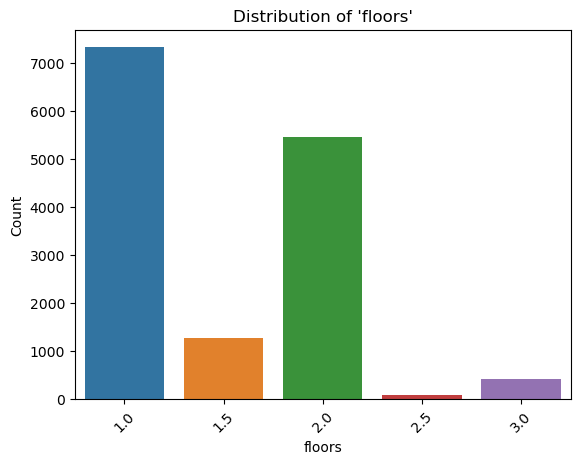

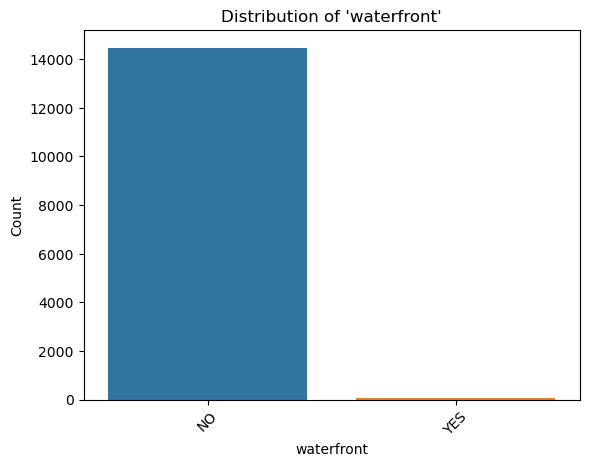

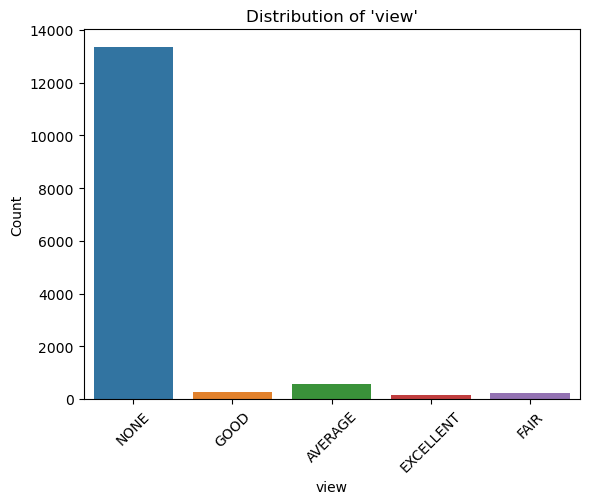

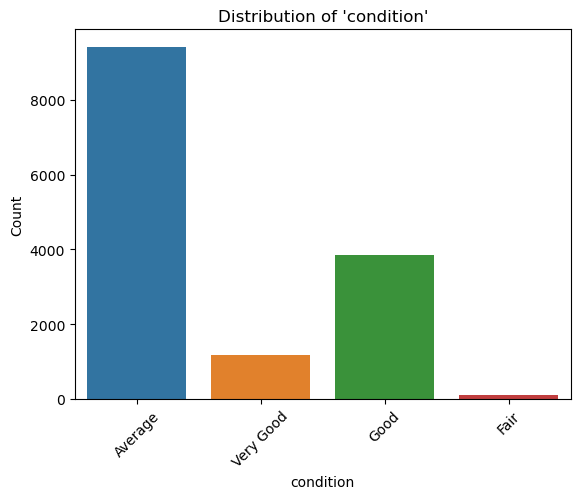

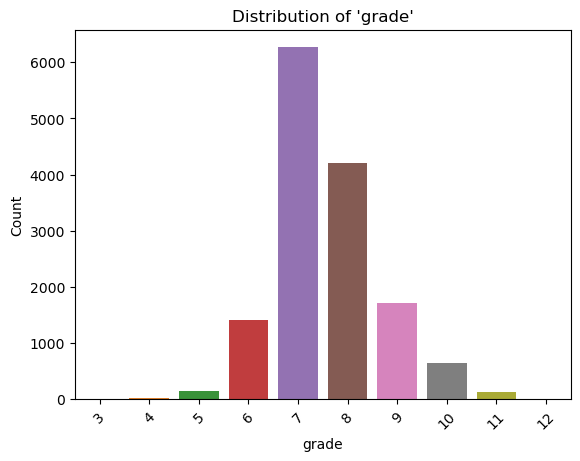

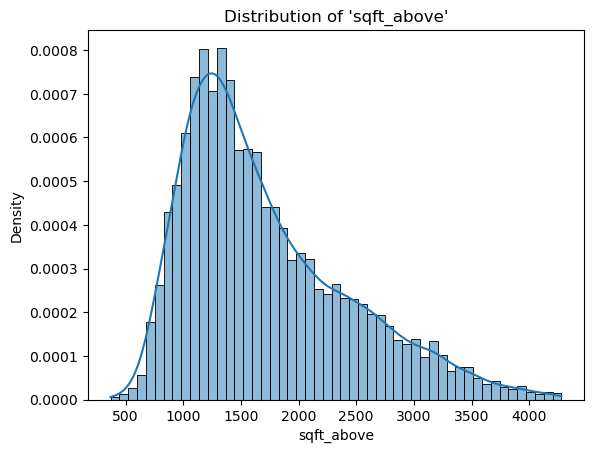

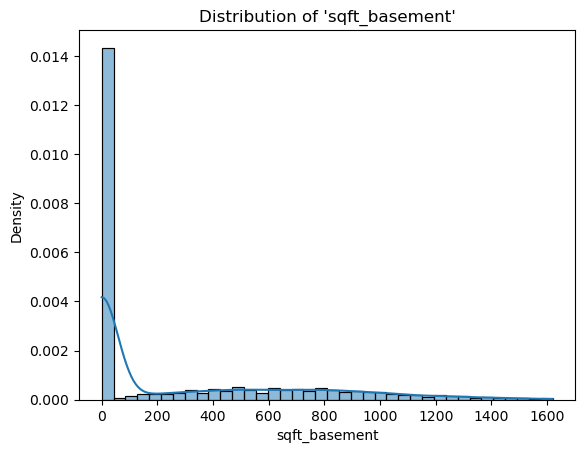

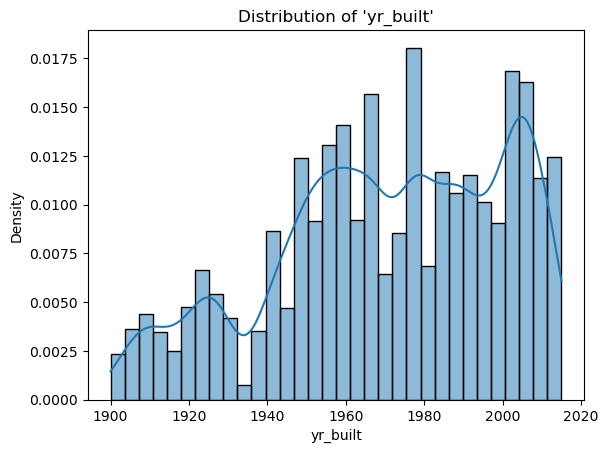

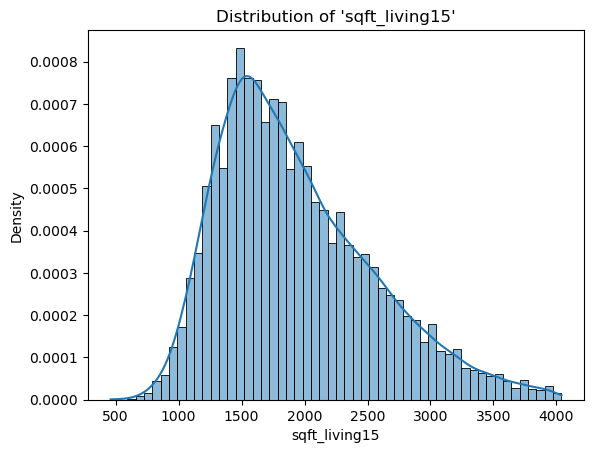

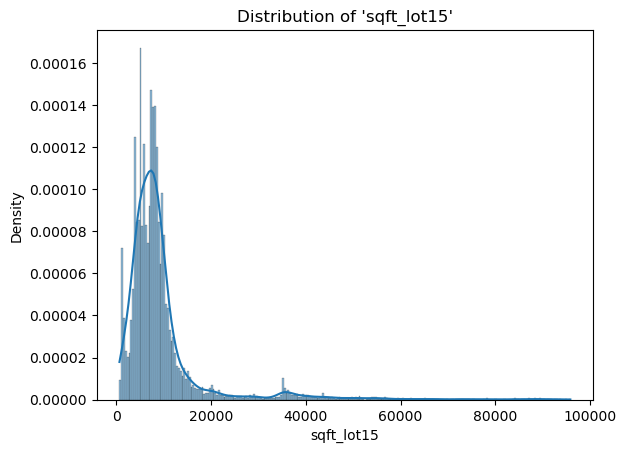

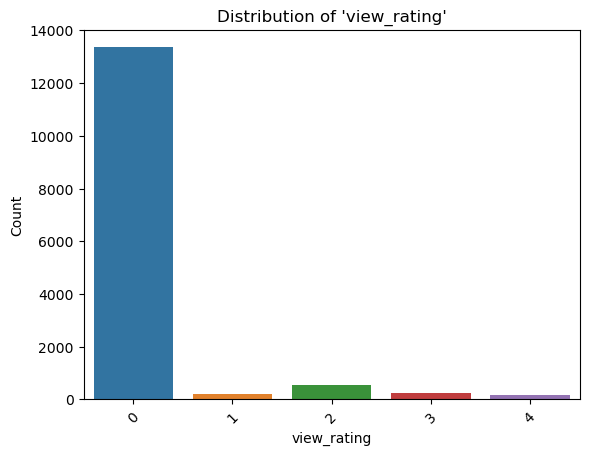

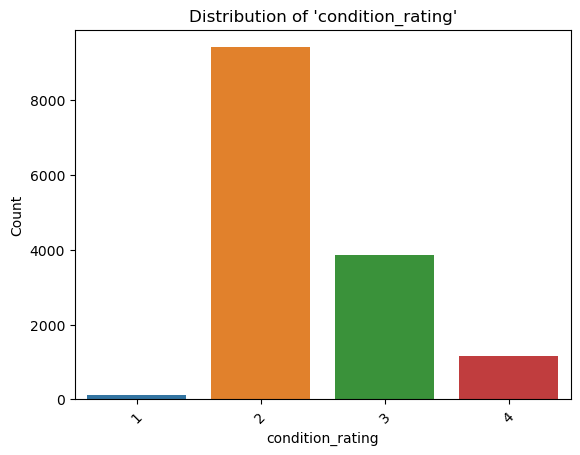

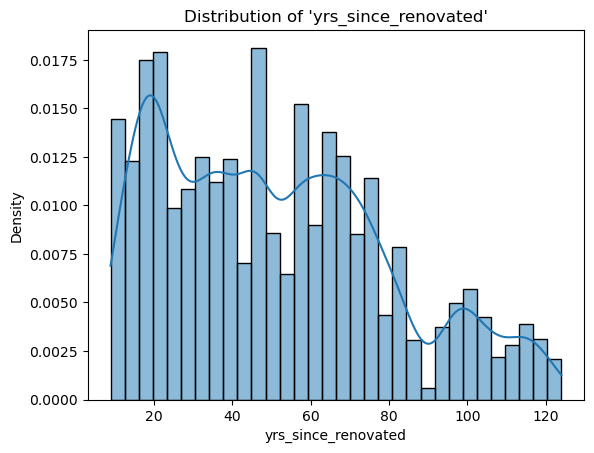

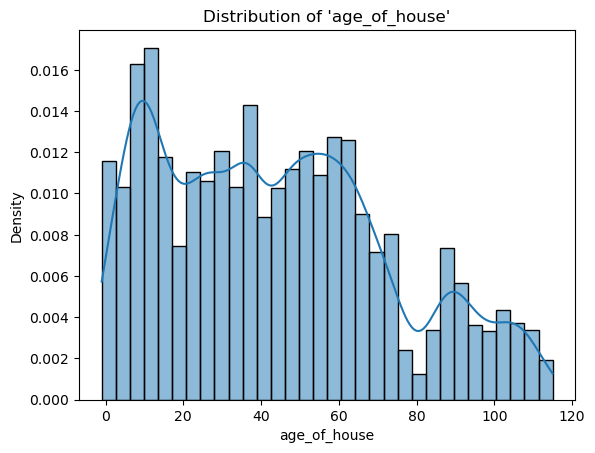

In [25]:
# Check for normal distribution
def check_normal_distribution(data,exclude_columns=[]):
   
    for col in clean_data.columns:
        if clean_data[col].dtype == 'object' or clean_data[col].nunique() < 20:
            # If the column is categorical or has less than 20 unique values, use countplot
            sns.countplot(data=clean_data, x=col)
            plt.title(f"Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45) 
            plt.show()
        elif pd.api.types.is_numeric_dtype(clean_data[col]) and col not in exclude_columns:
            sns.histplot(clean_data[col], kde=True, stat="density")
            plt.title(f"Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.show()


exclude = ['price','yr_renovated', 'view_rating', 'condition_rating', 'long','lat', 'waterfront_bool']
check_normal_distribution(clean_data,exclude_columns=exclude)

# Data Analysis
> Let us perform data analysis to extract insights which we can use to answer the research questions we formulated at the beginning.

## 1. Bivariate & Correlation Analysis

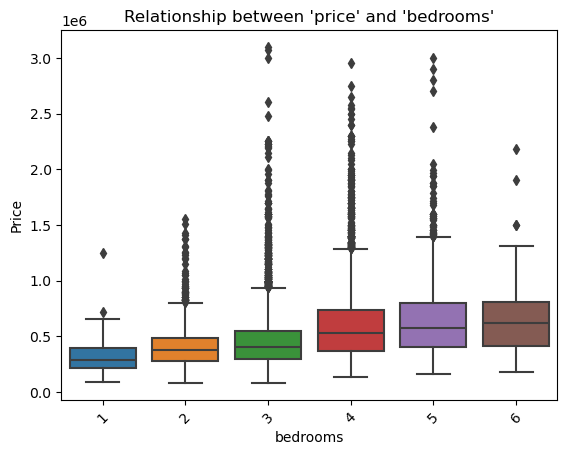

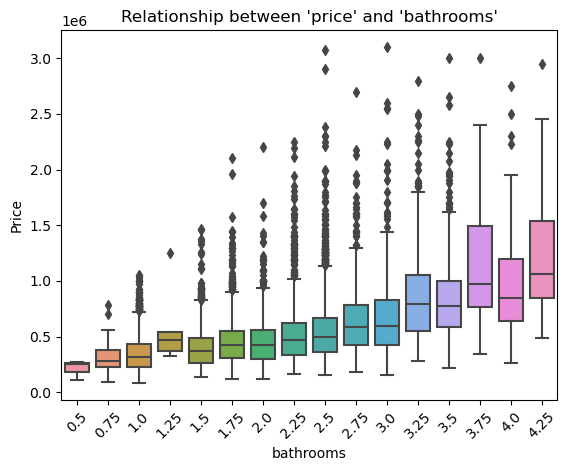

Correlation coefficient between 'price' and 'sqft_living': 0.6356935724736175


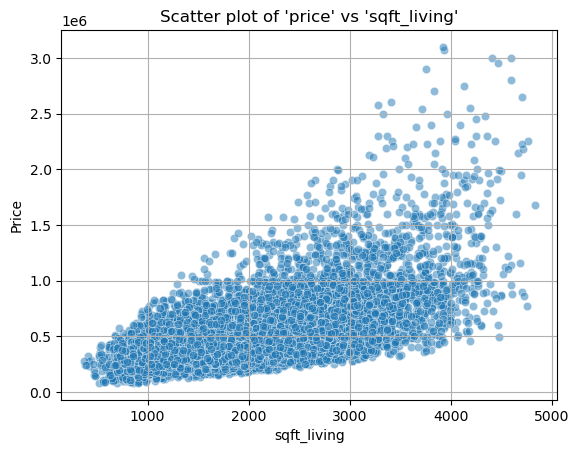

Correlation coefficient between 'price' and 'sqft_lot': 0.09406070529427626


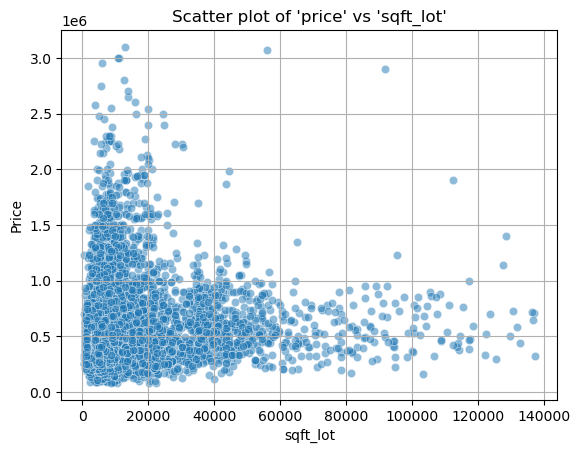

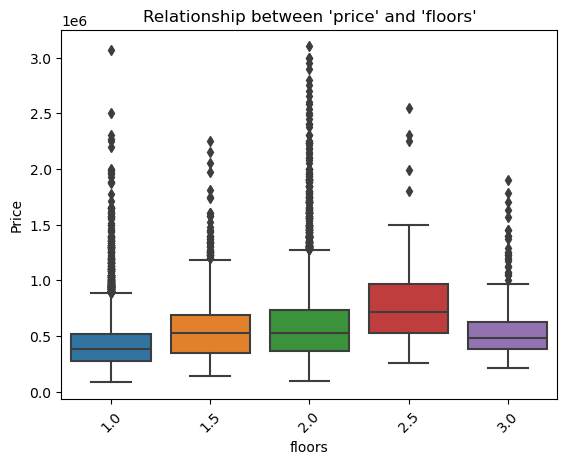

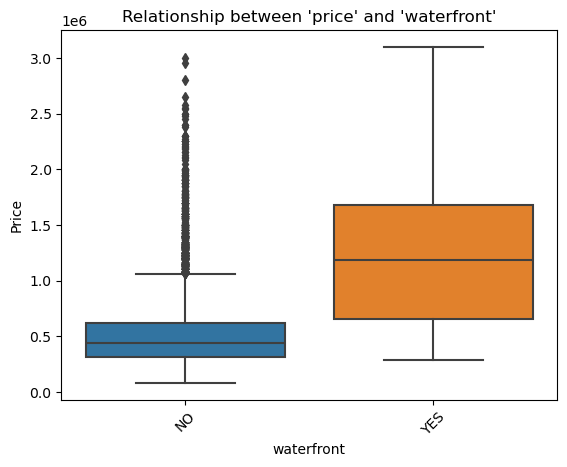

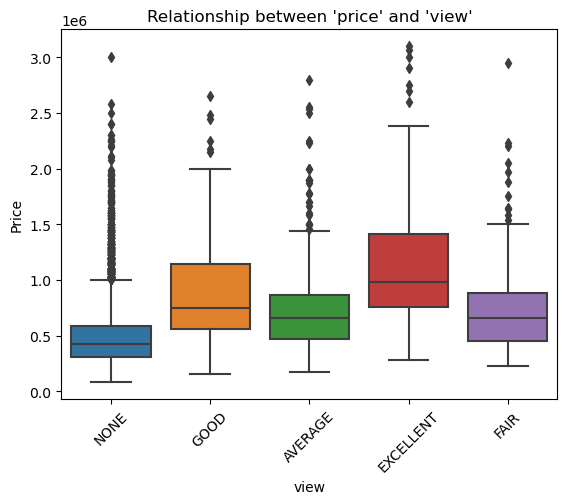

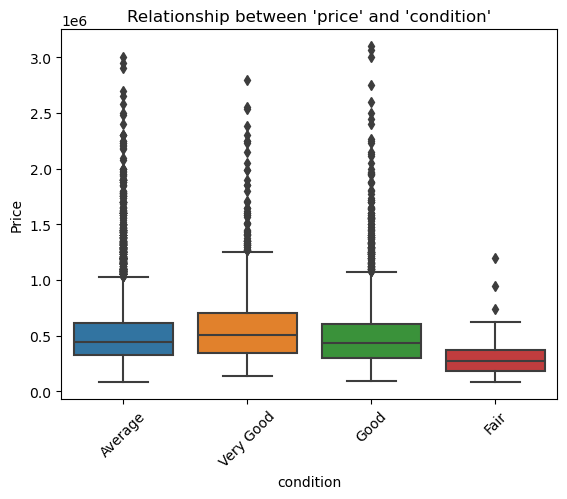

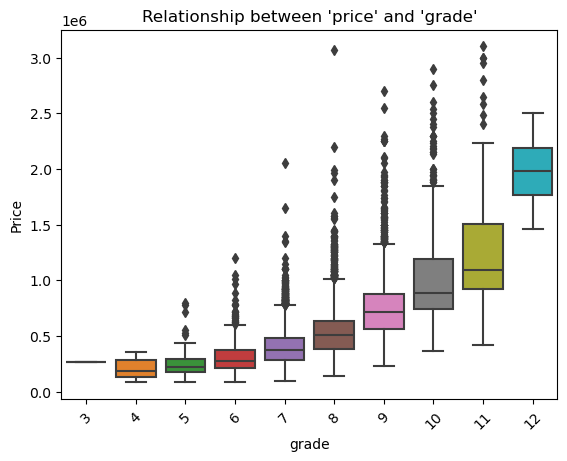

Correlation coefficient between 'price' and 'sqft_above': 0.5345736577367847


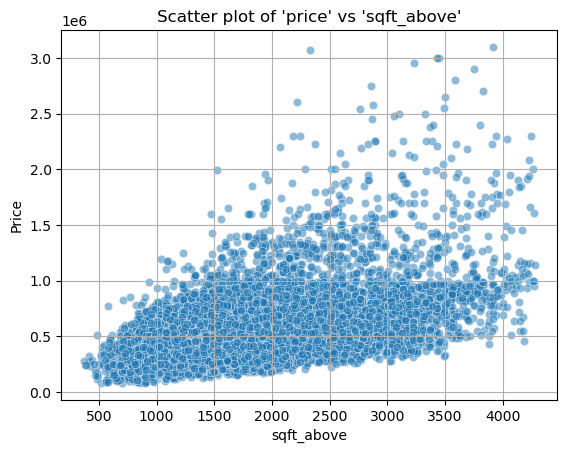

Correlation coefficient between 'price' and 'sqft_basement': 0.2525262464928534


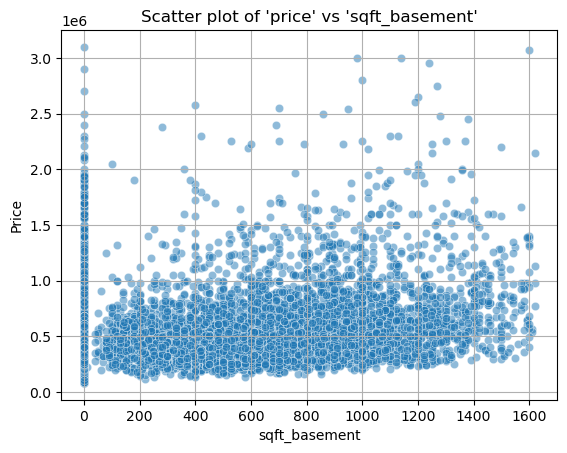

Correlation coefficient between 'price' and 'yr_built': 0.01885148630171255


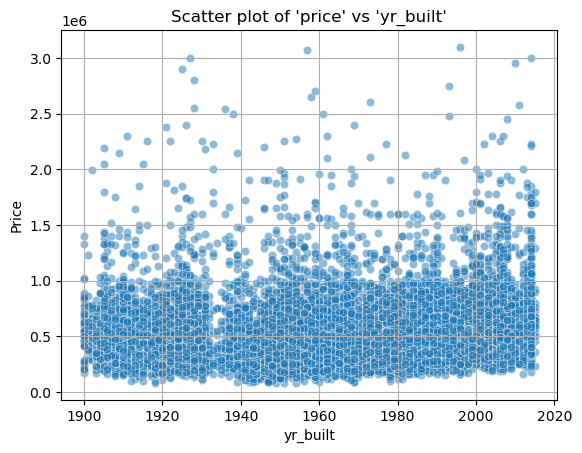

Correlation coefficient between 'price' and 'sqft_living15': 0.5561823644443877


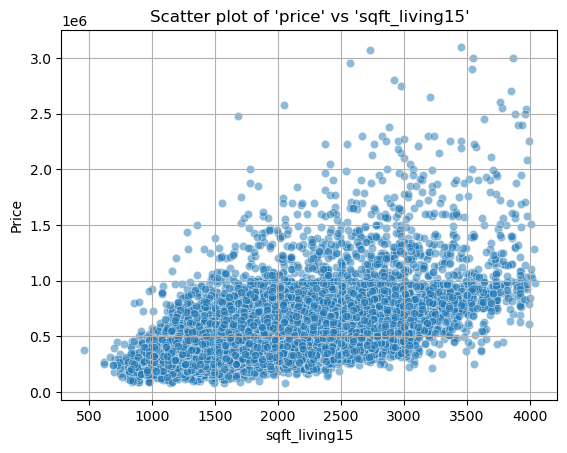

Correlation coefficient between 'price' and 'sqft_lot15': 0.08490012088911118


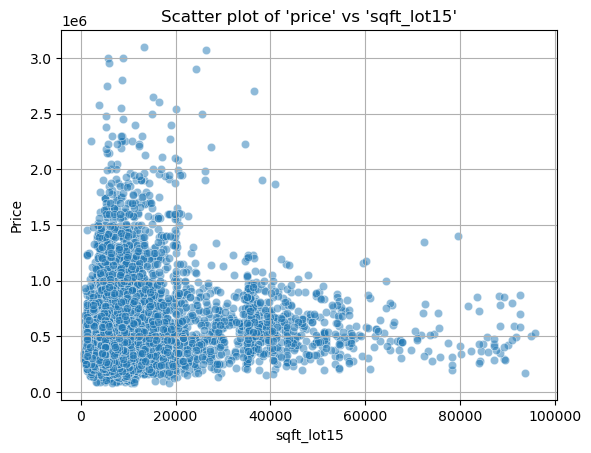

Correlation coefficient between 'price' and 'yrs_since_renovated': -0.0697252413842053


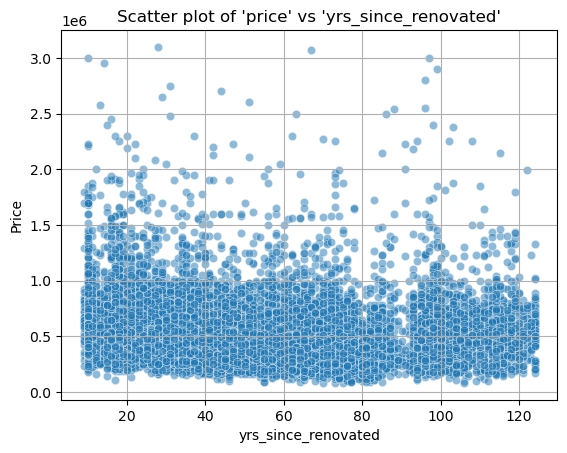

Correlation coefficient between 'price' and 'age_of_house': -0.018566980767651578


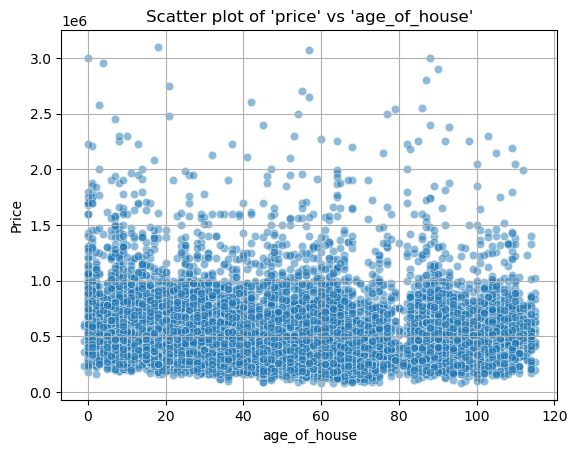

In [26]:
def correlation_and_scatterplots(data, discrete_columns, exclude_columns=[]):
    
  for col in data.columns:
    
    if col in discrete_columns:
        
        sns.boxplot(data=data, x=col, y='price')
        # sns.swarmplot(data=data, x=col, y='price')  # Uncomment this line for swarm plot instead of box plot
        plt.title(f"Relationship between 'price' and '{col}'")
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
        plt.show()
    elif pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_columns:
        correlation = data['price'].corr(data[col])
        print("=================================================================================")
        print(f"Correlation coefficient between 'price' and '{col}': {correlation}")
        print("=================================================================================")
        sns.scatterplot(data=data, x=col, y='price', alpha=0.5)
        plt.title(f"Scatter plot of 'price' vs '{col}'")
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()

exclude = ['yr_renovated', 'price', 'view_rating', 'condition_rating', 'lat', 'long', 'waterfront_bool']
discrete_columns = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'waterfront']
correlation_and_scatterplots(clean_data, discrete_columns, exclude_columns=exclude)

### 1.1 More on Correlation

In [27]:
def correlation(df,column=None,rank=None):
    '''
    performs correlation matrix, drops non numeric object types
    variables are dataframe, column, and ranking
    ranking is optional
    column = 'column'
    rank = True for # rank 1,2,3...
    
    '''
    # Redundant check. Makes sure all columns of object type are dropped
    df_object = df.select_dtypes(include='object')
    print(f'The following columns were dropped due to being object types\n{df_object.columns.tolist()}')
    df = df.drop(df_object,axis=1) 
    df1 = df
    if rank is True:
        try:
            df_corr = df1.corr()[column]
            df_corr = df_corr.drop(column)
            print(f'Ranked correlation to {column}')
            return(df_corr.rank(ascending=False).sort_values())
        except:
            df_corr = df1.corr()
            return(df_corr.rank(ascending=False))
    else:    
        try:
            df_corr = df.corr()[column]
            df_corr = df_corr.drop(column)
            print(f'Correlation to {column}')
            return(df_corr.sort_values(ascending=False))
        except:
            df_corr = df1.corr()
            return(df_corr)

The following columns were dropped due to being object types
['waterfront', 'view', 'condition']


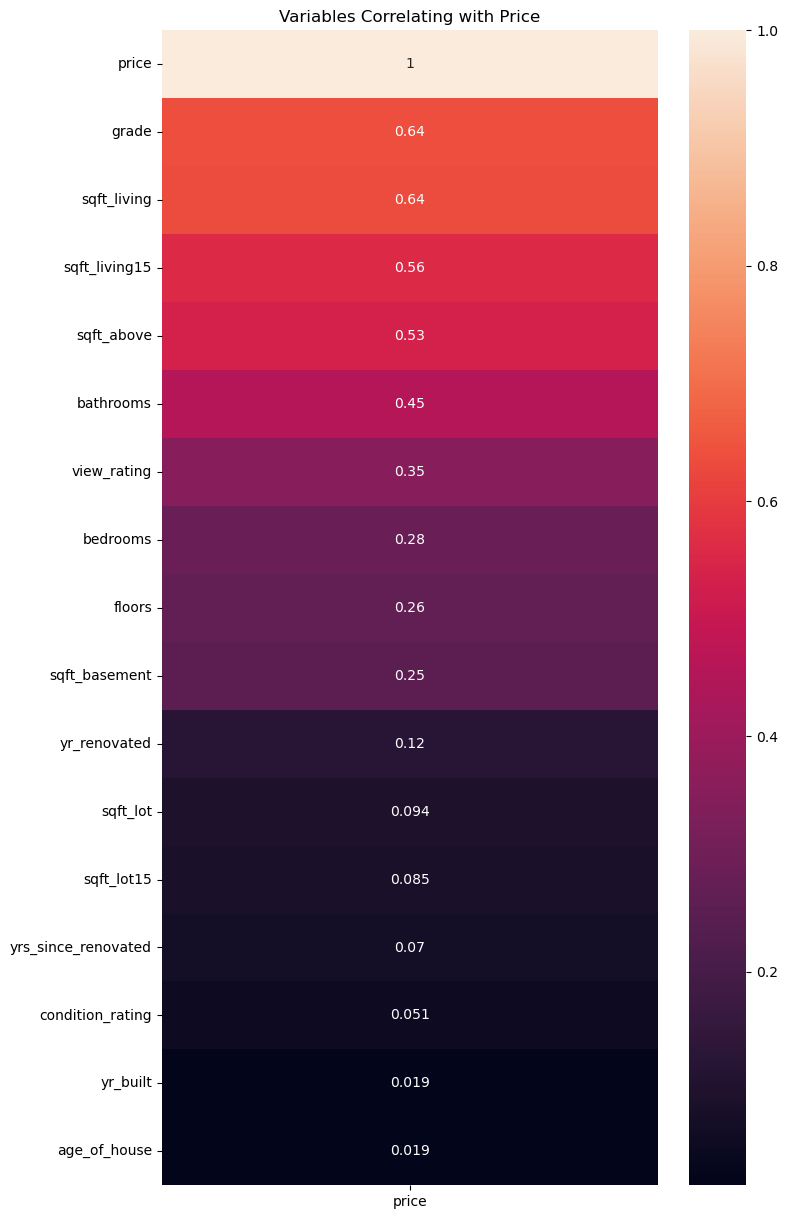

In [28]:
# Getting the correlation between variables
df_corr = abs(correlation(clean_data))
fig, ax = plt.subplots(figsize=(8,15))
sns.heatmap(df_corr[['price']].sort_values(by='price',ascending=False),annot = True)

ax.set_title('Variables Correlating with Price');
# plt.savefig('Group_plots/correlation_plot.png', dpi=100)

>**Summary:** Continuous data with the highest correlations with price include : `sqft_living`, `sqft_above`, `sqft_living15` while those with the lowest correlations include: `sqft_lot`, `yr_built`, `sqft_lot15` and `yrs_since_renovated`. `sqft_basement` has a moderate correlaton.

>For the discrete data; increase in `bedrooms`,`bathrooms`, `grade`, and `waterfront` seem to show a correlational increase in the median price as well as a greater spread of prices in some cases. While features such as `condition`, `view` and `floors` showed an increase to a certain extent indicating that there is an optimum value for these features.

### 1.2 Multicollinearity

In [29]:
corr_with_price = df_corr[['price']].sort_values(by='price',ascending=False)
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in df_corr[feature].T.items():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in df_corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by='Correlations', ascending=False)
print('Multicollinear Features')
display(MC_df)
print('Correlations with Price')
display(corr_with_price)

Multicollinear Features


,Correlations,Features
4,0.999873,"[yr_built, age_of_house]"
8,0.999873,"[age_of_house, yr_built]"
7,0.914201,"[yrs_since_renovated, age_of_house]"
9,0.914201,"[age_of_house, yrs_since_renovated]"
3,0.914176,"[yr_built, yrs_since_renovated]"
6,0.914176,"[yrs_since_renovated, yr_built]"
0,0.856004,"[sqft_living, sqft_above]"
2,0.856004,"[sqft_above, sqft_living]"
1,0.811805,"[sqft_lot, sqft_lot15]"
5,0.811805,"[sqft_lot15, sqft_lot]"


Correlations with Price


,price
price,1.000000
grade,0.636755
sqft_living,0.635694
sqft_living15,0.556182
sqft_above,0.534574
bathrooms,0.453108
view_rating,0.353736
bedrooms,0.283225
floors,0.264618
sqft_basement,0.252526


> `sqft_living` and `sqft_above` features are highly correlated to each other to each other so we can choose to do away with one of the two features which is less correlated with the target variable `price`.We will do away with `sqft_above`.

> `sqft_lot` and `sqft_lot15` are highly correlated with each other so we can choose one of the features that is highly correlated with `price` the target variable which is `sqft_lot`.

> If `yr_built` and `age_of_house` are highly correlated, it's not surprising since age_of_house is essentially derived from yr_built. They convey the same information in different forms. In this case, you would typically choose to keep only one of them.We will do away with `yr_built`.

> `yr-renovated` and `yr_built` are highly correlated with each other but `yrs_since_renovated` is highly correlated `price` so we will keep it.

In [30]:
clean_data.drop(columns = ['sqft_above','sqft_lot15','yr_built','date'],inplace = True)

# Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
* Train/Test Split; 80:20, 70:30, 60:40
* 
Regression models, SLR, MLR, Naive Bayes

***

## Predicting Housing Prices in King County
### Base Model: Simple Linear Regression
***

> First let's import the necessary libraries and tools for statistical modeling.

In [31]:
import statsmodels .api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_goldfeldquandt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import linregress

> We then create a function that builds a simple linear regression model using OLS method.

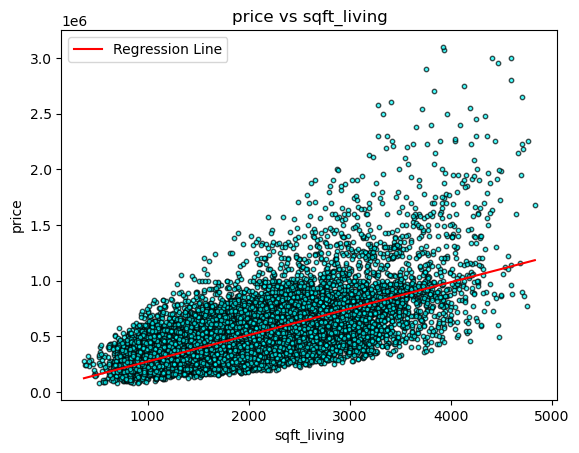

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     9868.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        17:18:31   Log-Likelihood:            -1.9969e+05
No. Observations:               14554   AIC:                         3.994e+05
Df Residuals:                   14552   BIC:                         3.994e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.483e+04   5092.994      6.839      

In [34]:
def visualize_regression(clean_data, column1, column2):
    """
    Visualizes a linear regression model between two columns of a given dataset.

    Parameters:
        clean_data (DataFrame): The cleaned dataset containing the columns for analysis.
        column1 (str): The name of the independent variable column.
        column2 (str): The name of the dependent variable column.

    Returns:
        None. Displays a plot of the regression line and data points."""
    
    # title = input("Enter the title for the model: ")
    # xlabel = input("Enter the xlabel for the model: ")
    # ylabel = input("Enter the ylabel for the model: ")
    
    X = clean_data[[column1]]
    y = clean_data[column2] 
    
    # Fit OLS model
    baseline_results = sm.OLS(y, sm.add_constant(X)).fit()
    summary = baseline_results.summary()
    # Generate predicted values
    x = np.linspace(clean_data[column1].min(), clean_data[column1].max(), 100)
    Y_predicted = baseline_results.params[0] + baseline_results.params[1] * x
    
    # Plot regression line and data points
    plt.plot(x, Y_predicted, color='red', label='Regression Line')
    plt.scatter(clean_data[column1], y, color='cyan', alpha=0.7, s=10, edgecolors='black')
    plt.xlabel(f"{column1}")
    plt.ylabel(f"{column2}")
    plt.title(f"{column2} vs {column1}")
    plt.legend()
    plt.show()
    return print(summary)

# Example usage:
visualize_regression(clean_data, 'sqft_living', 'price')

> The coefficient represents the estimated intercept of the regression line. In this case, the intercept is approximately 34,830. This means that when the square footage of living space (`sqft_living`) is zero (which may not be practically meaningful), the estimated price of the property is around $34,830.

> The coefficient for `sqft_living` is approximately 237.75. This indicates that for each additional square foot of living space, the estimated price of the property increases by approximately $237.75, holding other variables constant.

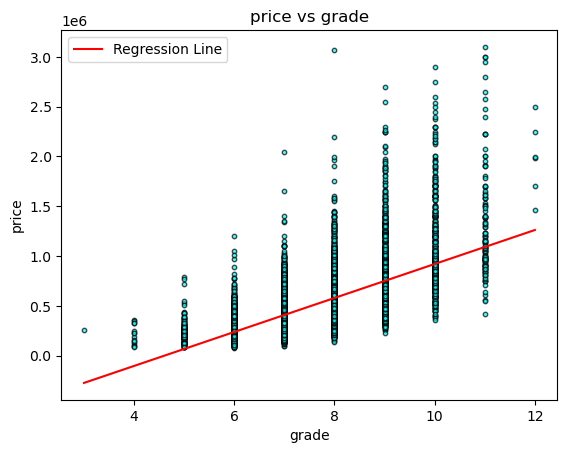

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     9924.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        17:18:36   Log-Likelihood:            -1.9968e+05
No. Observations:               14554   AIC:                         3.994e+05
Df Residuals:                   14552   BIC:                         3.994e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.85e+05   1.31e+04    -59.929      0.0

In [35]:
visualize_regression(clean_data,'grade','price')

> The coefficient for `grade` is approximately 170,600. This indicates that for each unit increase in the `grade` variable, the estimated price of the property increases by approximately $170,600, holding other variables constant.

### Model 2: Multiple linear Regression Approach
> Next we'll do a regression analysis with multiple features from the king county housing dataset.

In [37]:
# Assigning price for the dependent variable and other features as the independent variables
y = clean_data['price']
X_iterated = clean_data[['bedrooms','bathrooms','sqft_living','sqft_lot',
                        'floors','sqft_basement','yr_renovated','sqft_living15',
                        'condition_rating','yrs_since_renovated','view_rating','age_of_house']]

iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
# Fitting the model with a regression line
iterated_results = iterated_model.fit()
# Getting the summary of the model
iterated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1421.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        17:33:17   Log-Likelihood:            -1.9782e+05
No. Observations:               14554   AIC:                         3.957e+05
Df Residuals:                   14541   BIC:                         3.958e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.799e+05   1.28e+04    -21.796      0.000   -3.05e+05   -2.55e+05
bedrooms            -4.791e+04   2423.288    -19.772      0.000   -5.27e+04   -4.32e+04
bathrooms            5.156e+04   4039.861     12.763      0.000    4.36e+04    5.95e+04
sqft_living           188.1018      4.563     41.225      0.000     179.158     197.045
sqft_lot               -1.2378      0.143     -8.674      0.000      -1.517      -0.958
floors               6.811e+04   4249.229     16.029      0.000    5.98e+04    7.64e+04
sqft_basement          -1.3475      5.369     -0.251      0.802     -11.872       9.177
yr_renovated           32.5094     10.640      3.055      0.002      11.653      53.365
sqft_living15          95.9718      4.187     22.919      0.000      87.764     104.180
condition_rating     2.299e+04   2762.950      8.322      0.000    1.76e+04    2.84e+04
yrs_since_renovated   342.7365    349.516      0.981      0.327    -342.360    1027.833
view_rating          6.894e+04   2486.285     27.729      0.000    6.41e+04    7.38e+04
age_of_house         2379.1855    344.364      6.909      0.000    1704.188    3054.183
==============================================================================
Omnibus:                     5785.359   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53818.289
Skew:                           1.653   Prob(JB):                         0.00
Kurtosis:                      11.821   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***

> Based on the provided OLS regression results;<br>
>
>**R-squared:** The R-squared value is 0.540, indicating that approximately 54% of the variance in housing prices is explained by the independent variables included in the model.<br>
**Coefficients:**<br>
    1. `bedrooms`: Each additional bedroom is associated with a decrease in housing prices by approximately 47,910, holding other variables constant.<br>
    2. `bathrooms`: Each additional bathroom is associated with an increase in housing prices by approximately 51,560, holding other variables constant.<br>
    3. `floors`: Each additional floor is associated with an increase in housing prices by approximately 68,110, holding other variables constant.<br>
    4. `condition_rating`: Each unit increase in the condition rating is associated with an increase in housing prices by approximately 22,990, holding other variables constant.<br>
**P-values:** Most of the coefficients have p-values less than 0.05, indicating that they are statistically significant predictors of housing prices. However, coefficients for `sqft_basement` and `yrs_since_renovated` are not statistically significant at the 0.05 level.
>
> **Overall Significance:** As we add more features, the R-squared has also increased meaning that our model's accuracy has increased.

### Model 2: 

# Regression Results

* Metrics for regression;

# Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

# Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
* Findings; Analysis, Modeling
***